In [1]:
import os
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [3]:
df["State"]=state_df_zip(df)

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess_onehot.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)


In [4]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,None,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,None,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,None,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,None,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,None,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,None,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,None,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,None,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,None,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [5]:
df.fillna("Unknown or not specified", inplace=True)

C:\Users\unaif\AppData\Local\Temp\ipykernel_6272\4206166486.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown or not specified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown or not specified", inplace=True)


In [6]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [7]:
df=df.drop(columns=["Company", "Date received",	"Date sent to company" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [8]:
df.drop(columns=["Complaint ID"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company response,Timely response?,Consumer disputed?
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,Unknown or not specified,2127.0,Closed with explanation,Yes,Yes
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,Unknown or not specified,44241.0,Closed with explanation,Yes,Yes
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,Unknown or not specified,77433.0,Closed with explanation,Yes,Yes
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,Unknown or not specified,84405.0,Closed with non-monetary relief,Yes,Yes
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,Unknown or not specified,60411.0,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,Unknown or not specified,48622.0,Closed with explanation,Yes,No
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,Unknown or not specified,72160.0,Closed with monetary relief,Yes,No
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,Unknown or not specified,75201.0,Closed with non-monetary relief,Yes,No
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,Unknown or not specified,55105.0,Closed with non-monetary relief,Yes,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   ZIP code            6006 non-null   object
 6   Company response    6006 non-null   object
 7   Timely response?    6006 non-null   object
 8   Consumer disputed?  6006 non-null   object
dtypes: object(9)
memory usage: 469.2+ KB


In [10]:
X=df.drop(columns=["Consumer disputed?"])

In [11]:
y=df["Consumer disputed?"]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_str', FunctionTransformer(convert_to_str)),  # ← named function
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
knn=KNeighborsClassifier()

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', SMOTE(random_state=42)),
    ('classifier', knn)
])

# Train the pipeline

In [13]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [14]:
trained_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('to_str',
                                                  FunctionTransformer(func=<function convert_to_str at 0x00000234BB23C0E0>)),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Product', 'Sub-product', 'Issue',
                                  'Sub-issue', 'State', 'ZIP code',
                                  'Company response', 'Timely response?'])])

In [15]:
import optuna

param_distributions = {
 'classifier__n_neighbors': optuna.distributions.IntDistribution(3, 25),
    'classifier__weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
    'classifier__algorithm': optuna.distributions.CategoricalDistribution(['auto', 'ball_tree', 'kd_tree', 'brute']),
    'classifier__leaf_size': optuna.distributions.IntDistribution(10, 60),
    'classifier__p': optuna.distributions.IntDistribution(1, 2),  # 1: Manhattan, 2: Euclidean
    'classifier__metric': optuna.distributions.CategoricalDistribution(['minkowski', 'euclidean', 'manhattan']),
}

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=True, shuffle=True)

In [17]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param_distributions,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=30,  # Number of trials/studies
    timeout=None,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_6272\2954802289.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-04 11:59:01,131] A new study created in memory with name: no-name-80a36eb5-00dc-41b2-b72b-ce4251d15669
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using b

OptunaSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer()),
                                                                                           ('scaler',
                                                                                            StandardScaler())]),
                                                                           []),
                                                                          ('cat',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer(strategy='most_frequent')),
                                                                                           ('to_str',
                                                                                            FunctionTransformer(func=<funct...
                                    'classifier__metric': CategoricalDistribution(choices=('minkowski', 'euclidean', 'manhattan')),
                                    'classifier__n_neighbors': IntDistribution(high=25, log=False, low=3, step=1),
                                    'classifier__p': IntDistribution(high=2, log=False, low=1, step=1),
                                    'classifier__weights': CategoricalDistribution(choices=('uniform', 'distance'))},
               random_state=42, scoring='f1_macro', verbose=2)

In [18]:
model_pipeline.set_params(**optuna_search.best_params_)
model_pipeline.fit(X_train, y_train)


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('to_str',
                                                                   FunctionTransformer(func=<function convert_to_str at 0x00000234BB23C0E0>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product', 'Sub-product',
                                                   'Issue', 'Sub-issue',
                                                   'State', 'ZIP code',
                                                   'Company response',
                                                   'Timely response?'])])),
                ('oversampler', SMOTE(random_state=42)),
                ('classifier',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=28,
                                      metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [19]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

param_distributions = {
    "randomforestclassifier__n_estimators": IntDistribution(50, 500),
    "randomforestclassifier__max_depth": IntDistribution(2, 30),
    "randomforestclassifier__min_samples_split": IntDistribution(2, 20),
    "randomforestclassifier__min_samples_leaf": IntDistribution(1, 20),
    "randomforestclassifier__max_features": CategoricalDistribution(["sqrt", "log2", None]),
    "randomforestclassifier__bootstrap": CategoricalDistribution([True, False]),
    "randomforestclassifier__class_weight": CategoricalDistribution(['balanced', 'balanced_subsample', None ]),

}

In [20]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,1.000000
1,0.428571
2,1.000000
3,1.000000
4,1.000000
...,...
4800,0.333333
4801,1.000000
4802,1.000000
4803,0.000000


In [155]:
y_pred = (y_probs[0] > 0.672).astype(int)
y_pred


0       1
1       0
2       1
3       1
4       1
       ..
4800    0
4801    1
4802    1
4803    0
4804    0
Name: 0, Length: 4805, dtype: int64

In [156]:
y_test.value_counts()

Consumer disputed?
1                     3772
0                     1033
Name: count, dtype: int64

In [157]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.5579604578563996
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.52      0.33      1033
           1       0.81      0.57      0.67      3772

    accuracy                           0.56      4805
   macro avg       0.53      0.54      0.50      4805
weighted avg       0.69      0.56      0.60      4805

Confusion Matrix:


<Axes: >

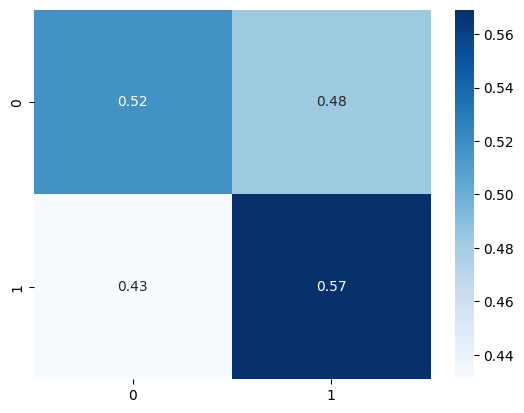

In [158]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
(heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1]))


In [159]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


nan
nan


c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Use

In [160]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_knn.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_knn.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [161]:
import dill
with open("modelo_pipe_dispute_knn.dill", "wb") as f:
    dill.dump(model_pipeline, f)

In [162]:
trained_preprocessor.transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44147 stored elements and shape (6006, 1215)>

In [163]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

(6006, 1)
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...


In [164]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 1215)
   0     1     2     3     4     5     ...  1209  1210  1211  1212  1213  1214
0     0     0     0     0     0     0  ...     0   1.0     0     0     0   1.0
1     0   1.0     0     0     0     0  ...     0   1.0     0     0     0   1.0
2     0     0     0     0   1.0     0  ...     0   1.0     0     0     0   1.0
3     0     0     0     0   1.0     0  ...     0     0     0   1.0     0   1.0
4     0     0     0     0   1.0     0  ...     0   1.0     0     0     0   1.0

[5 rows x 1215 columns]


In [165]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214
0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1.0
1,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1.0
2,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1.0
3,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1.0
4,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,1.0
6002,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,1.0
6003,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1.0
6004,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,1.0
